<a href="https://colab.research.google.com/github/KiranJoshi25/X_ray_classification/blob/main/xray_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [2]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/xray_dataset_covid19/train',
                                          target_size = (500,500),
                                          batch_size = 8,
                                          class_mode ='binary')
Validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/xray_dataset_covid19/validation',
                                          target_size = (500,500),
                                           batch_size = 8,
                                           class_mode ='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [5]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(500,500,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    
                                  
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                    ])

In [7]:

from tensorflow.keras import optimizers
model.compile(
              loss='binary_crossentropy', 
              
              optimizer = optimizers.Adam(learning_rate=0.001),
              
              metrics = ['accuracy'])

In [8]:
history = model.fit(train_dataset,steps_per_epoch=15,epochs=10,
                      validation_data = Validation_dataset)


Epoch 1/10
15/15 [==============================] - 67s 4s/step - loss: 1.9126 - accuracy: 0.5833 - val_loss: 0.6035 - val_accuracy: 0.5357
Epoch 2/10
15/15 [==============================] - 6s 380ms/step - loss: 0.3486 - accuracy: 0.8750 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 5s 360ms/step - loss: 0.0928 - accuracy: 0.9833 - val_loss: 0.1502 - val_accuracy: 0.9643
Epoch 4/10
15/15 [==============================] - 6s 381ms/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.2148 - val_accuracy: 0.9286
Epoch 5/10
15/15 [==============================] - 5s 363ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.3445 - val_accuracy: 0.9286
Epoch 6/10
15/15 [==============================] - 6s 380ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.2270 - val_accuracy: 0.9643
Epoch 7/10
15/15 [==============================] - 6s 370ms/step - loss: 0.0076 - accuracy: 0.9917 - val_loss: 0.3510 - val_accuracy: 0.9643
Epoch 8/

In [9]:
Validation_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

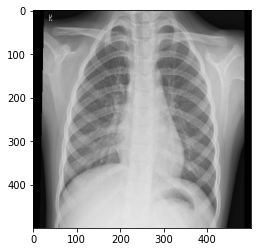

[[0.]]
NORMAL


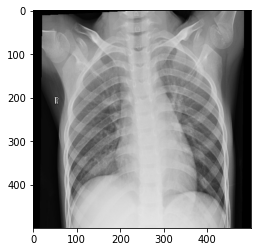

[[0.]]
NORMAL


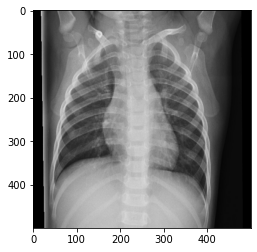

[[0.]]
NORMAL


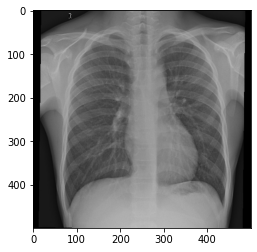

[[0.]]
NORMAL


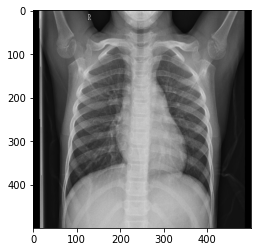

[[1.]]
PNEUMONIA


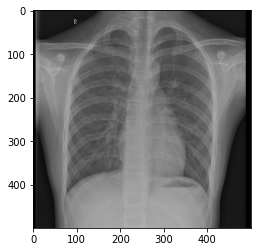

[[1.]]
PNEUMONIA


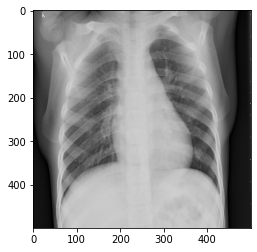

[[0.]]
NORMAL


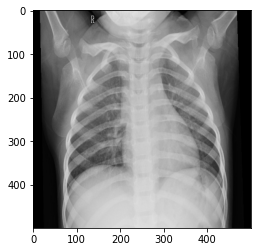

[[1.]]
PNEUMONIA


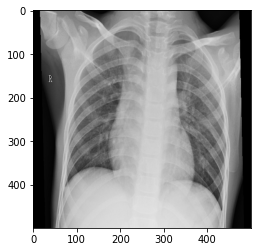

[[0.]]
NORMAL


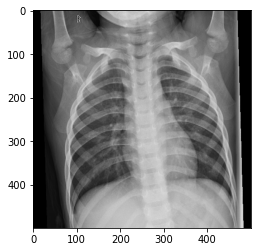

[[0.]]
NORMAL


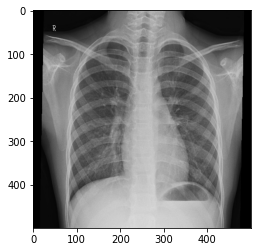

[[0.]]
NORMAL


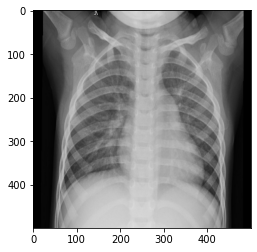

[[0.]]
NORMAL


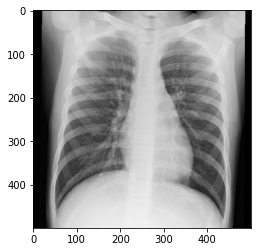

[[0.]]
NORMAL


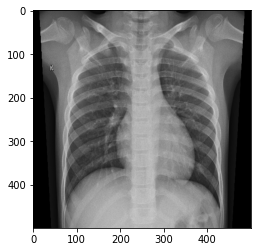

[[0.]]
NORMAL


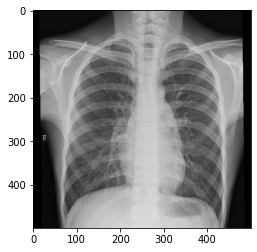

[[0.]]
NORMAL


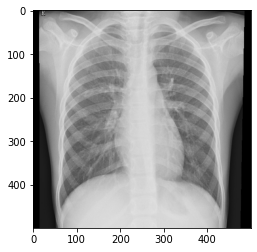

[[0.]]
NORMAL


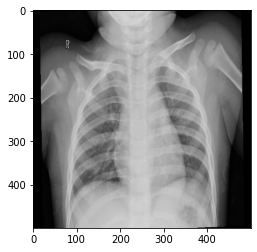

[[0.]]
NORMAL


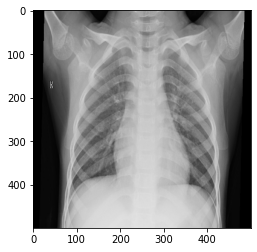

[[0.]]
NORMAL


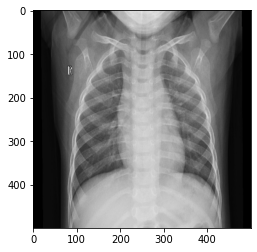

[[0.]]
NORMAL


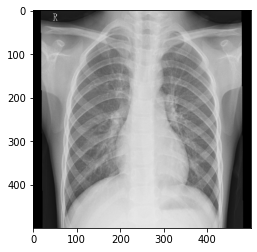

[[0.]]
NORMAL


In [39]:
dir_path = '/content/drive/MyDrive/xray_dataset_covid19/test/NORMAL'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(500,500))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if (val == 0):
        print("NORMAL")
    else:
        print("PNEUMONIA")

In [10]:
model.save("model.cnn")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.cnn/assets


In [27]:
def image_import (img_path, class_type, appended_list):
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
       
        img = cv2.imread(read_path)
        img = cv2.resize(img, (500, 500))
        appended_list.append([img, class_type])
        

In [28]:

img_path = '/content/drive/MyDrive/xray_dataset_covid19/test/PNEUMONIA'
testing_data=[]
image_import(img_path, 1, testing_data)

In [29]:
print(testing_data)

[[array([[[ 32,  32,  32],
        [ 32,  32,  32],
        [ 33,  33,  33],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 35,  35,  35]],

       [[ 35,  35,  35],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 38,  38,  38],
        [ 37,  37,  37],
        [ 36,  36,  36]],

       [[ 33,  33,  33],
        [ 32,  32,  32],
        [ 32,  32,  32],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       ...,

       [[231, 231, 231],
        [230, 230, 230],
        [235, 235, 235],
        ...,
        [251, 251, 251],
        [241, 241, 241],
        [240, 240, 240]],

       [[232, 232, 232],
        [234, 234, 234],
        [241, 241, 241],
        ...,
        [242, 242, 242],
        [246, 246, 246],
        [240, 240, 240]],

       [[230, 230, 230],
        [237, 237, 237],
        [233, 233, 233],
        ...,
        [239, 239, 239],
        [243, 243, 243],
        [242, 242, 242

In [30]:
#import normal lung images
img_path = '/content/drive/MyDrive/xray_dataset_covid19/test/NORMAL'
image_import(img_path, 0, testing_data)

In [32]:
import random
random.shuffle(testing_data)

In [34]:
#seperate testing to XY
test_features = []
test_targets = []

for f, t in testing_data:
    test_features.append(f)
    test_targets.append(t)

test_features = np.array(test_features).reshape(-1, 500, 500, 3)
test_targets = np.array(test_targets)   
test_features = test_features/255

In [35]:
#confusion matrix calculation
false_negative = 0
false_positive = 0
true_negative = 0
true_positive = 0

result = model.predict_classes(test_features)
accuracy = model.evaluate(test_features,test_targets)[1]

for i in range(len(test_features)):
    if test_targets[i] == 1:
        if result[i] == 1:
            true_positive += 1
        elif result[i] == 0: 
            false_negative += 1
        else:
            print('error class not found')
    if test_targets[i] == 0:
        if result[i] == 1:
            false_positive += 1
        elif result[i] == 0: 
            true_negative += 1
        else:
            print('error class not found')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2/2 [==============================] - 0s 8ms/step - loss: 0.1010 - accuracy: 0.9500


In [37]:
#create confusion matrix data
import pandas as pd

test_result = [false_negative,
               true_negative,
              true_positive,
               false_positive]
adjusted_test_result = np.array(test_result)/(len(test_features))
df_test_result = pd.DataFrame(np.array(['false_negative','true_negative','true_positive','false_positive']),columns=['results'])
df_test_result['percent'] = adjusted_test_result
df_test_result

,results,percent
0,false_negative,0.025
1,true_negative,0.475
2,true_positive,0.475
3,false_positive,0.025


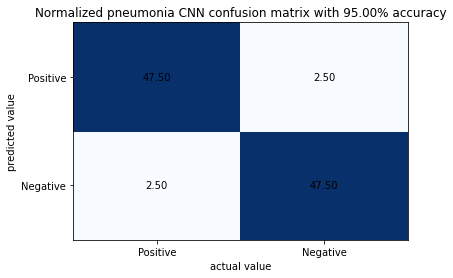

In [38]:
#confusion matrix plot 
fig,ax = plt.subplots()
heatmap = ax.pcolor((df_test_result['percent'].to_numpy().reshape(2,2)),cmap='Blues')
data = df_test_result['percent'].to_numpy().reshape(2,2)* 100
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        ax.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
ax.set_xticks([0.5,1.5])
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Positive','Negative'])
ax.set_yticklabels(['Negative','Positive'])
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Normalized pneumonia CNN confusion matrix with %.2f' %(accuracy*100)+ '% accuracy')
plt.savefig('90_87_model.png')
plt.show()

In [40]:

img_path = '/content/drive/MyDrive/xray_dataset_covid19/Random_test/PNEUMONIA'
testing_data=[]
image_import(img_path, 1, testing_data)

In [41]:
img_path = '/content/drive/MyDrive/xray_dataset_covid19/Random_test/NORMAL'
image_import(img_path, 0, testing_data)

In [42]:
import random
random.shuffle(testing_data)

In [43]:
#seperate testing to XY
test_features = []
test_targets = []

for f, t in testing_data:
    test_features.append(f)
    test_targets.append(t)

test_features = np.array(test_features).reshape(-1, 500, 500, 3)
test_targets = np.array(test_targets)   
test_features = test_features/255

In [44]:
#confusion matrix calculation
false_negative = 0
false_positive = 0
true_negative = 0
true_positive = 0

result = model.predict_classes(test_features)
accuracy = model.evaluate(test_features,test_targets)[1]

for i in range(len(test_features)):
    if test_targets[i] == 1:
        if result[i] == 1:
            true_positive += 1
        elif result[i] == 0: 
            false_negative += 1
        else:
            print('error class not found')
    if test_targets[i] == 0:
        if result[i] == 1:
            false_positive += 1
        elif result[i] == 0: 
            true_negative += 1
        else:
            print('error class not found')

1/1 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.8889


In [45]:
#create confusion matrix data
import pandas as pd

test_result = [false_negative,
               true_negative,
              true_positive,
               false_positive]
adjusted_test_result = np.array(test_result)/(len(test_features))
df_test_result = pd.DataFrame(np.array(['false_negative','true_negative','true_positive','false_positive']),columns=['results'])
df_test_result['percent'] = adjusted_test_result
df_test_result

,results,percent
0,false_negative,0.055556
1,true_negative,0.500000
2,true_positive,0.388889
3,false_positive,0.055556


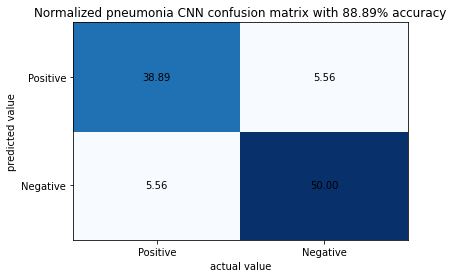

In [46]:
#confusion matrix plot 
fig,ax = plt.subplots()
heatmap = ax.pcolor((df_test_result['percent'].to_numpy().reshape(2,2)),cmap='Blues')
data = df_test_result['percent'].to_numpy().reshape(2,2)* 100
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        ax.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
ax.set_xticks([0.5,1.5])
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Positive','Negative'])
ax.set_yticklabels(['Negative','Positive'])
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Normalized pneumonia CNN confusion matrix with %.2f' %(accuracy*100)+ '% accuracy')
plt.savefig('90_87_model.png')
plt.show()